# 🔥 Enhanced Gradient Boosting Classifier – Demo Notebook
This notebook demonstrates training, evaluation, and visualization using the modular `EnhancedGradientBoostingClassifier` implemented in `models/enhanced_gbm.py`.

In [ ]:
!pip install scikit-learn

In [1]:
# 📦 Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from BoostingTrees.model.BoostingTrees import BoostingTreesClassifier

📉 Plotting Learning Curves...


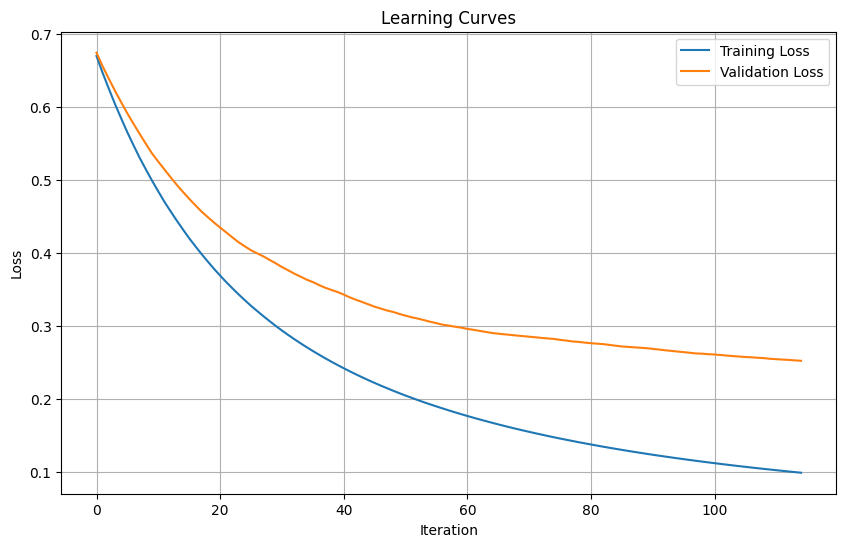

📊 Plotting Feature Importances...


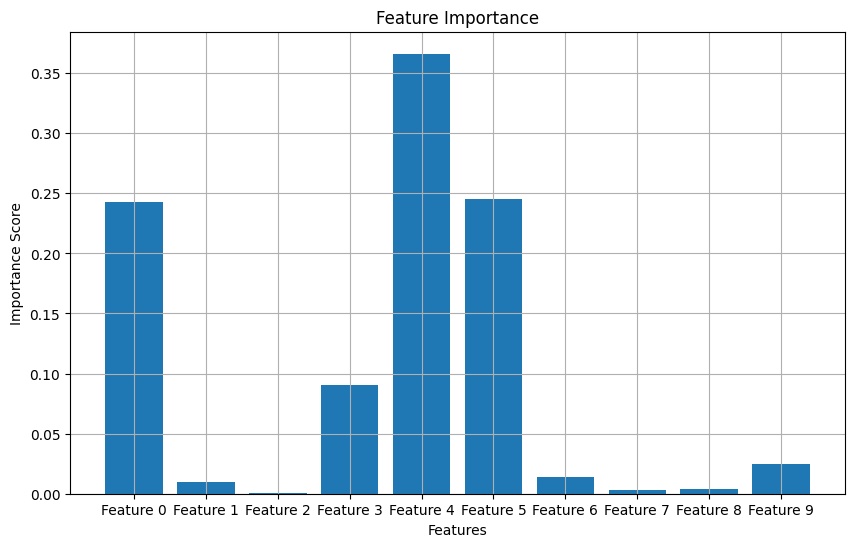

✅ Accuracy: 0.925
🔍 Confusion Matrix:
 [[107   5]
 [ 10  78]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       112
           1       0.94      0.89      0.91        88

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200

🔢 First 5 predicted probabilities:
 [[0.91402906 0.08597094]
 [0.08825663 0.91174337]
 [0.916275   0.083725  ]
 [0.91135557 0.08864443]
 [0.91142694 0.08857306]]


In [2]:

# --- Step 2: Generate synthetic data ---
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 3: Train the model ---
model = BoostingTreesClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    early_stopping_rounds=10,
    validation_fraction=0.1,
    n_jobs=4
)
model.fit(X_train, y_train)

# --- Step 4: Plot Learning Curves ---
print("📉 Plotting Learning Curves...")
model.plot_learning_curves()

# --- Step 5: Plot Feature Importances ---
print("📊 Plotting Feature Importances...")
model.plot_feature_importance()

# --- Step 6: Evaluate on Test Set ---
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))

# --- Step 7: Predicted Class Probabilities ---
probs = model.predict_proba(X_test)
print("🔢 First 5 predicted probabilities:\n", probs[:5])

🔁 Comparing Our Model vs Sklearn
✅ Custom Accuracy:  0.9300
✅ Sklearn Accuracy: 0.9600
🎯 Custom F1 Score:  0.9186
🎯 Sklearn F1 Score: 0.9545
⏱️ Sklearn Training Time: 0.21 seconds


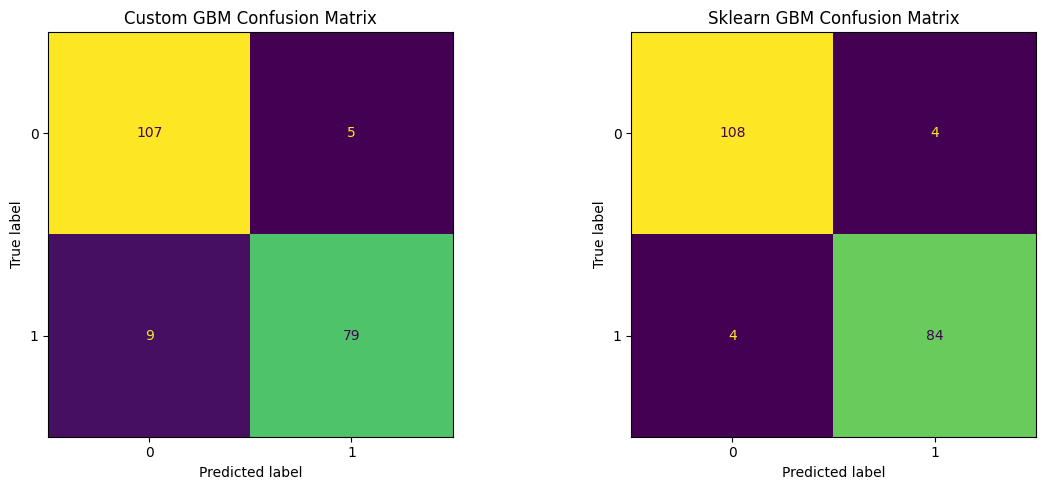

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


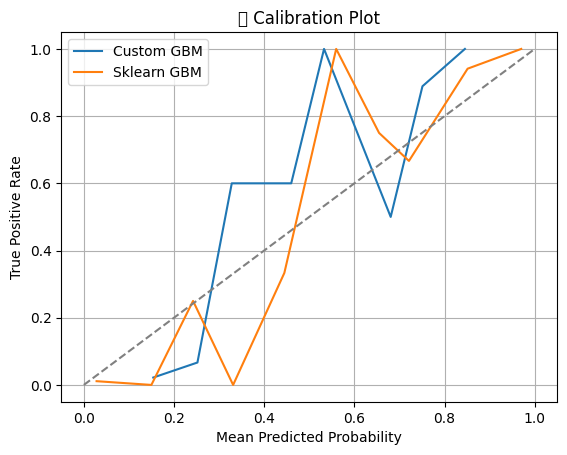

In [10]:
# Comparison between our model and sklearn model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
import time

# --- Train Sklearn's Model ---
start_time = time.time()
sk_model = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3
)
sk_model.fit(X_train, y_train)
sklearn_time = time.time() - start_time

# --- Predict ---
y_pred_sk = sk_model.predict(X_test)
y_pred_custom = model.predict(X_test)

# --- Compare Metrics ---
print("🔁 Comparing Our Model vs Sklearn")
print(f"✅ Custom Accuracy:  {accuracy_score(y_test, y_pred_custom):.4f}")
print(f"✅ Sklearn Accuracy: {accuracy_score(y_test, y_pred_sk):.4f}")
print(f"🎯 Custom F1 Score:  {f1_score(y_test, y_pred_custom):.4f}")
print(f"🎯 Sklearn F1 Score: {f1_score(y_test, y_pred_sk):.4f}")
print(f"⏱️ Sklearn Training Time: {sklearn_time:.2f} seconds")

# --- Confusion Matrix ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_custom, ax=ax[0], colorbar=False)
ax[0].set_title("Custom GBM Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sk, ax=ax[1], colorbar=False)
ax[1].set_title("Sklearn GBM Confusion Matrix")
plt.tight_layout()
plt.show()

# --- Calibration Plot (Optional) ---
from sklearn.calibration import calibration_curve

proba_custom = model.predict_proba(X_test)[:, 1]
proba_sk = sk_model.predict_proba(X_test)[:, 1]

true_cust, pred_cust = calibration_curve(y_test, proba_custom, n_bins=10)
true_sk, pred_sk = calibration_curve(y_test, proba_sk, n_bins=10)

plt.plot(pred_cust, true_cust, label="Custom GBM")
plt.plot(pred_sk, true_sk, label="Sklearn GBM")
plt.plot([0, 1], [0, 1], "--", color='gray')
plt.title("🧮 Calibration Plot")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


✅ Sklearn Accuracy: 0.9561, F1: 0.9650
✅ Custom  Accuracy: 0.9386, F1: 0.9504
⏱️ Sklearn Time: 0.29s, Custom Time: 664.81s


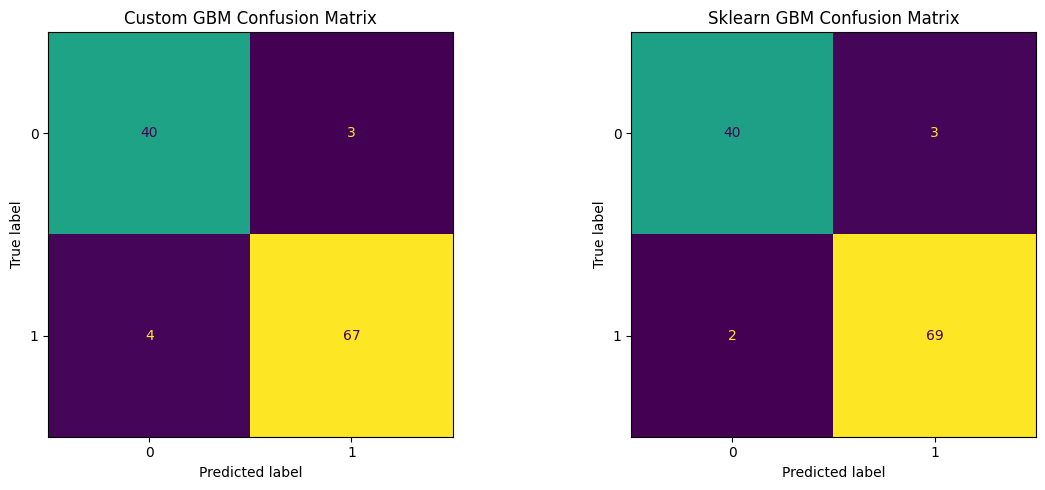

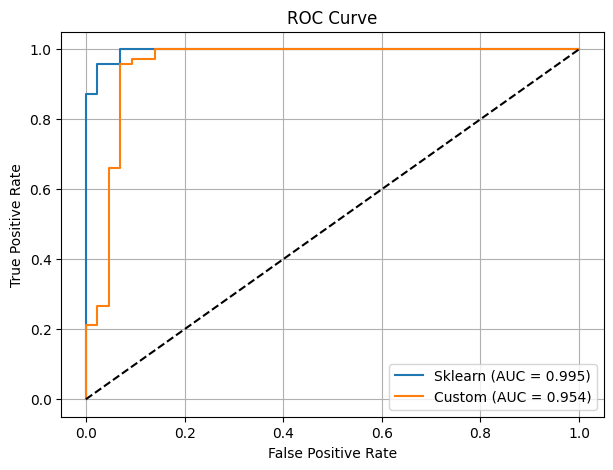

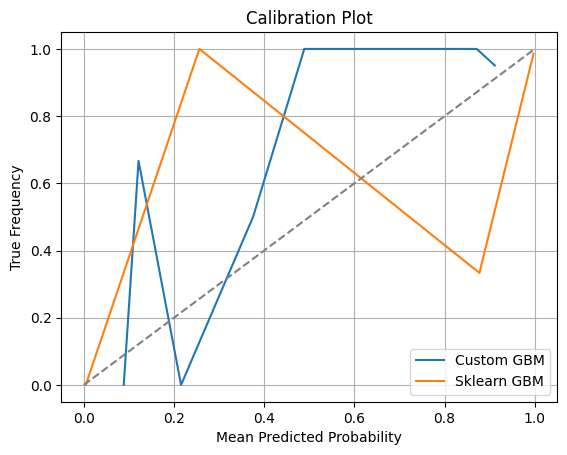

In [3]:
# Comparison between our model and sklern mdoel with dataset
# --- Step 1: Load Breast Cancer Dataset ---
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target

# Optional: normalize features for better convergence
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 2: Train both models ---
from sklearn.ensemble import GradientBoostingClassifier
import time

# Sklearn model
start_time = time.time()
sk_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
sk_model.fit(X_train, y_train)
sk_time = time.time() - start_time

# Your custom model
start_time = time.time()
my_model = BoostingTreesClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3,
    early_stopping_rounds=10, validation_fraction=0.1, n_jobs=4
)
my_model.fit(X_train, y_train)
my_time = time.time() - start_time

# --- Step 3: Predictions ---
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

y_pred_sk = sk_model.predict(X_test)
y_pred_my = my_model.predict(X_test)
proba_sk = sk_model.predict_proba(X_test)[:, 1]
proba_my = my_model.predict_proba(X_test)[:, 1]

# --- Step 4: Evaluation ---
print(f"✅ Sklearn Accuracy: {accuracy_score(y_test, y_pred_sk):.4f}, F1: {f1_score(y_test, y_pred_sk):.4f}")
print(f"✅ Custom  Accuracy: {accuracy_score(y_test, y_pred_my):.4f}, F1: {f1_score(y_test, y_pred_my):.4f}")
print(f"⏱️ Sklearn Time: {sk_time:.2f}s, Custom Time: {my_time:.2f}s")

# --- Step 5: Confusion Matrices ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_my, ax=ax[0], colorbar=False)
ax[0].set_title("Custom GBM Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sk, ax=ax[1], colorbar=False)
ax[1].set_title("Sklearn GBM Confusion Matrix")
plt.tight_layout()
plt.show()

# --- Step 6: ROC Curve ---
fpr_sk, tpr_sk, _ = roc_curve(y_test, proba_sk)
fpr_my, tpr_my, _ = roc_curve(y_test, proba_my)

plt.figure(figsize=(7, 5))
plt.plot(fpr_sk, tpr_sk, label=f'Sklearn (AUC = {auc(fpr_sk, tpr_sk):.3f})')
plt.plot(fpr_my, tpr_my, label=f'Custom (AUC = {auc(fpr_my, tpr_my):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# --- Step 7: Calibration Curve ---
from sklearn.calibration import calibration_curve
true_sk, pred_sk = calibration_curve(y_test, proba_sk, n_bins=10)
true_my, pred_my = calibration_curve(y_test, proba_my, n_bins=10)

plt.plot(pred_my, true_my, label="Custom GBM")
plt.plot(pred_sk, true_sk, label="Sklearn GBM")
plt.plot([0, 1], [0, 1], "--", color='gray')
plt.title("Calibration Plot")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("True Frequency")
plt.legend()
plt.grid(True)
plt.show()



📊 Dataset: Moons
✅ Sklearn Accuracy: 0.8867, F1: 0.8859, LogLoss: 0.2473
✅ Custom  Accuracy: 0.8600, F1: 0.8552, LogLoss: 0.3186


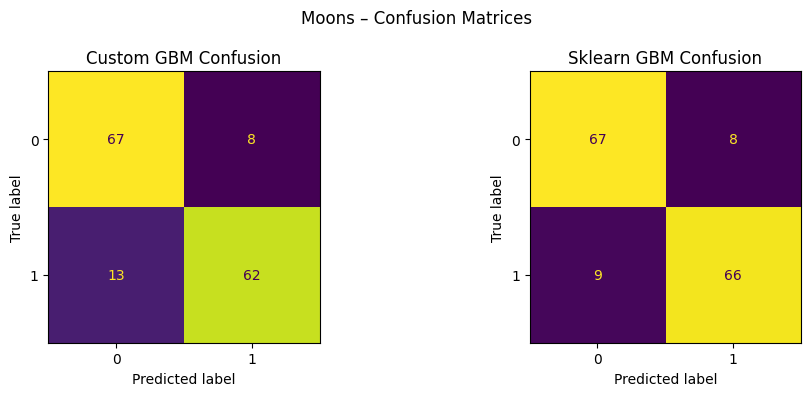

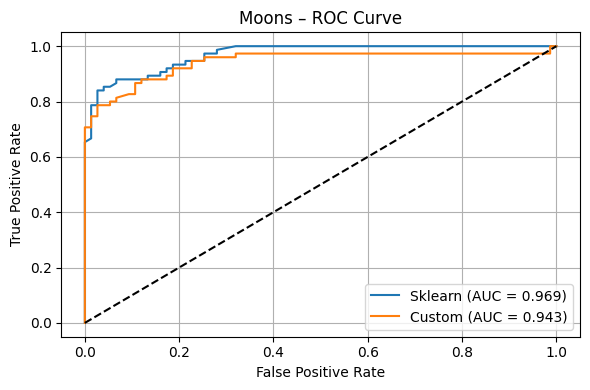

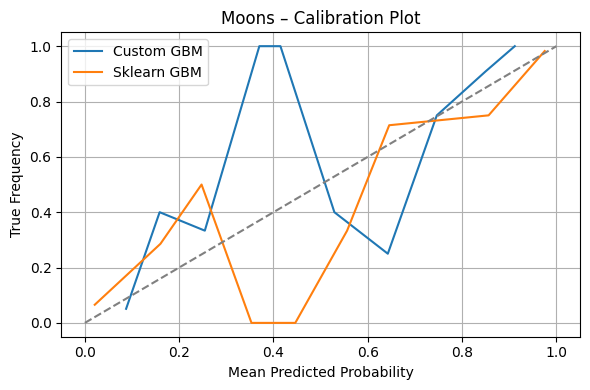

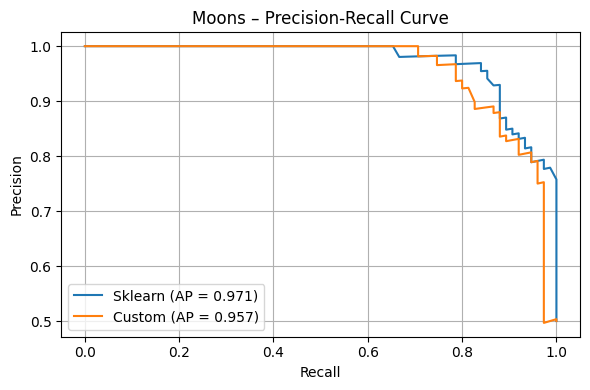

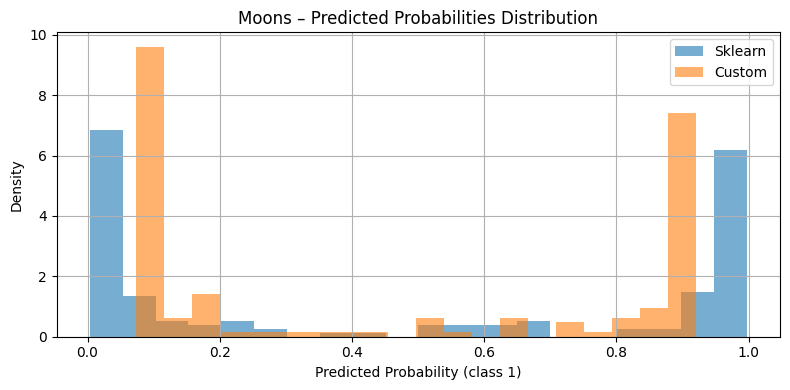

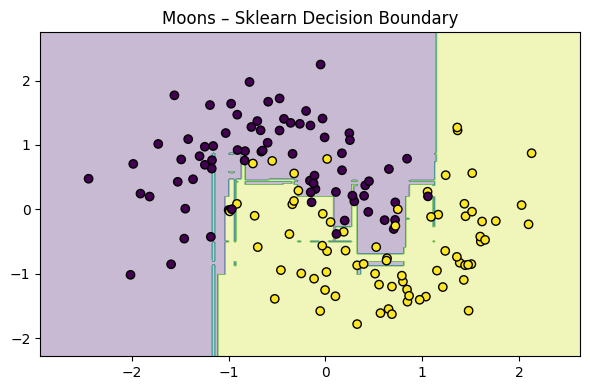

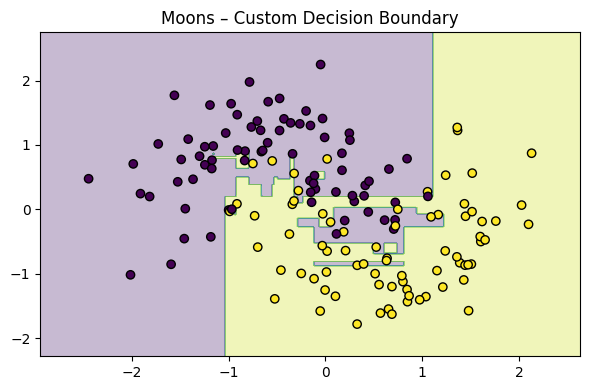


📊 Dataset: Circles
✅ Sklearn Accuracy: 0.7400, F1: 0.7417, LogLoss: 0.5428
✅ Custom  Accuracy: 0.7067, F1: 0.7067, LogLoss: 0.6634


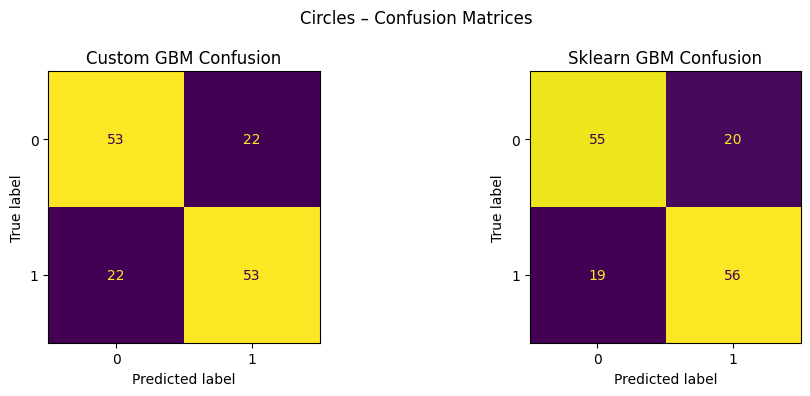

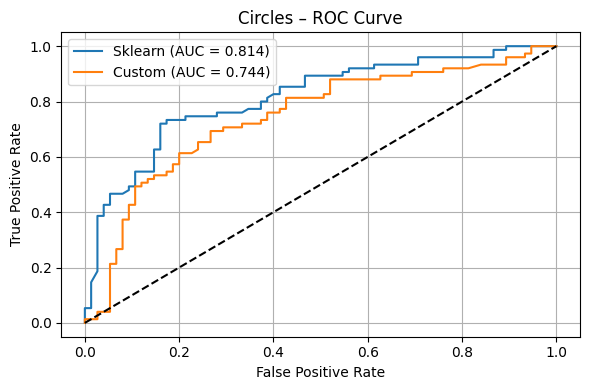

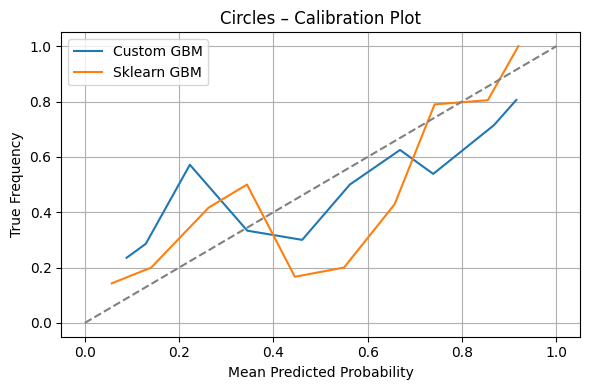

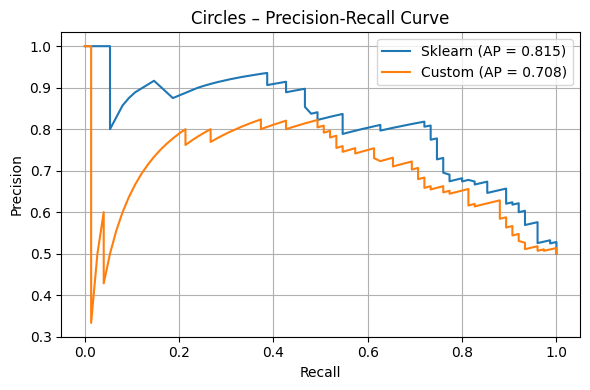

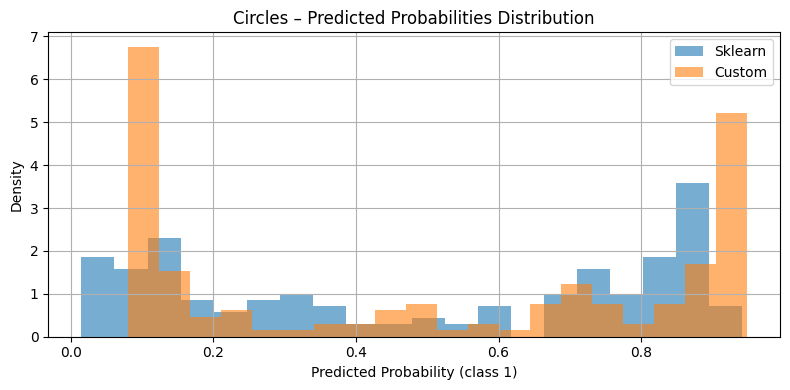

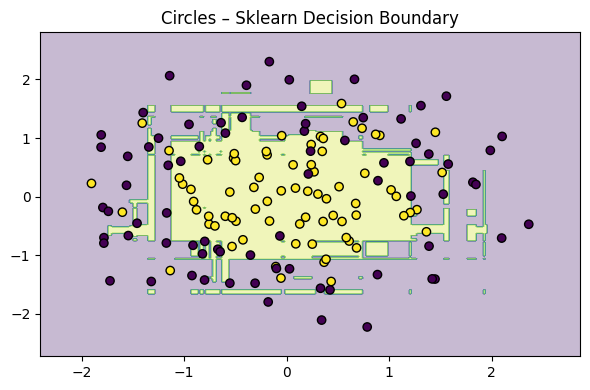

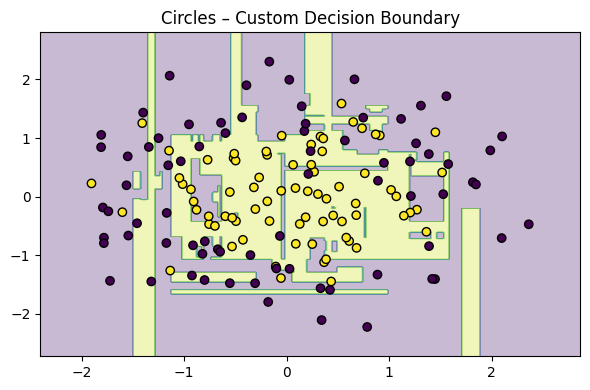


📊 Dataset: Linear
✅ Sklearn Accuracy: 0.9467, F1: 0.9474, LogLoss: 0.1811
✅ Custom  Accuracy: 0.9267, F1: 0.9299, LogLoss: 0.2213


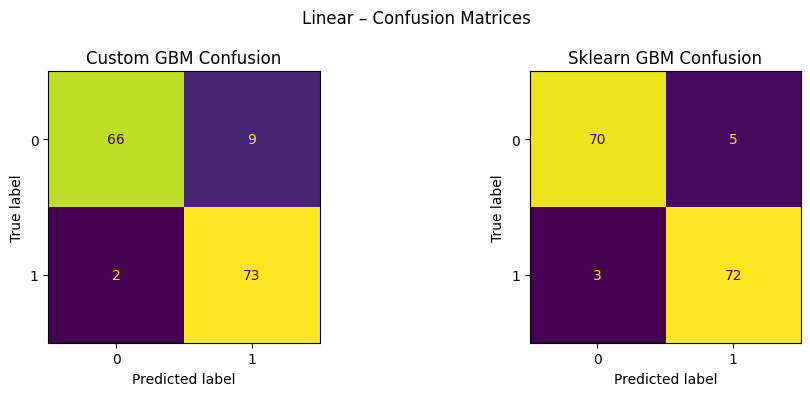

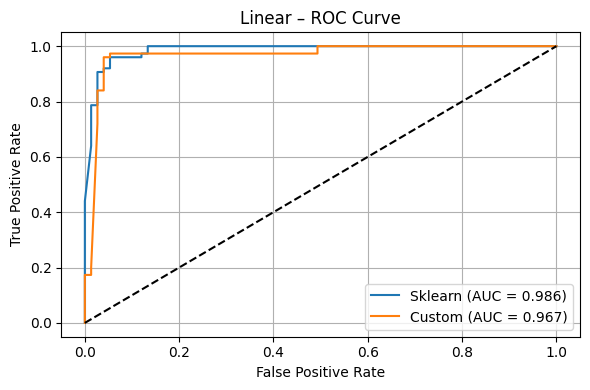

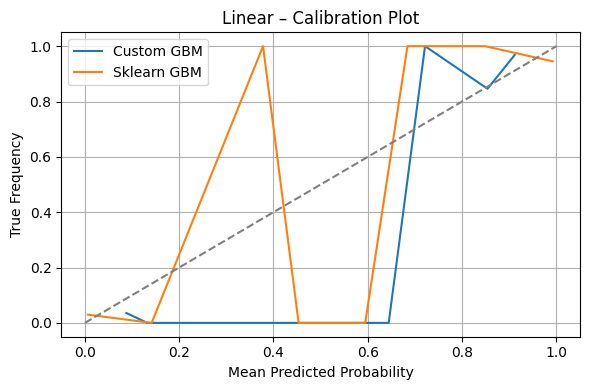

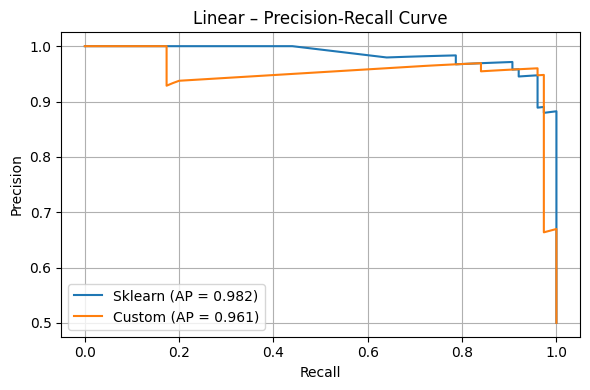

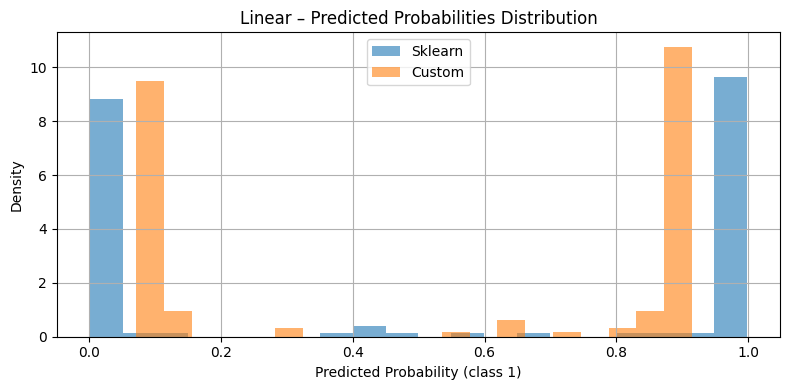

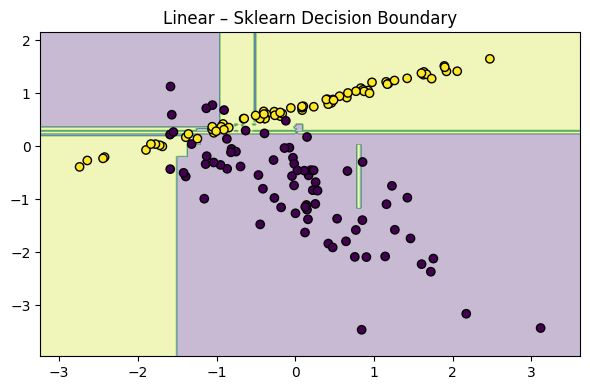

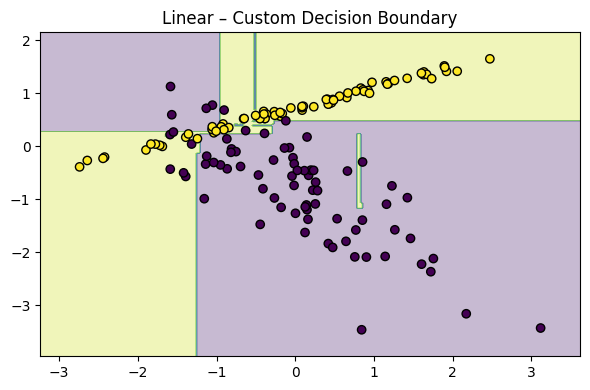


📊 Dataset: Medium Linear
✅ Sklearn Accuracy: 0.9567, F1: 0.9568, LogLoss: 0.1499
✅ Custom  Accuracy: 0.9433, F1: 0.9435, LogLoss: 0.2141


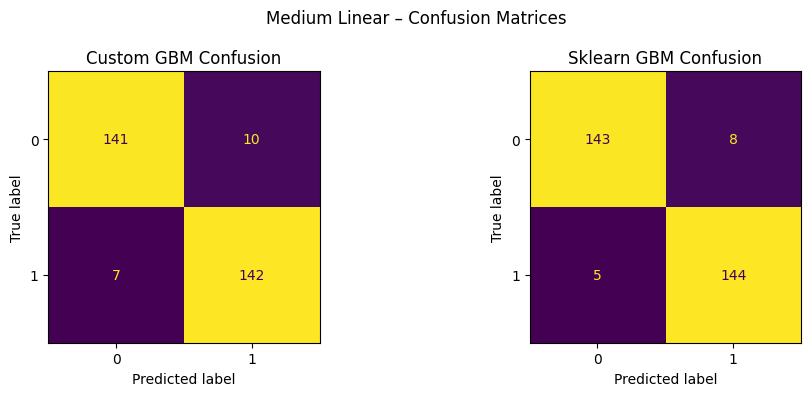

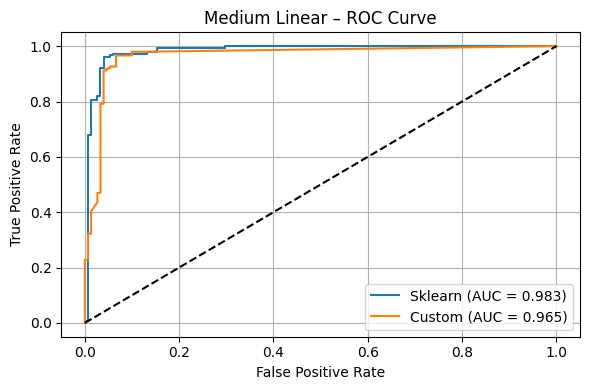

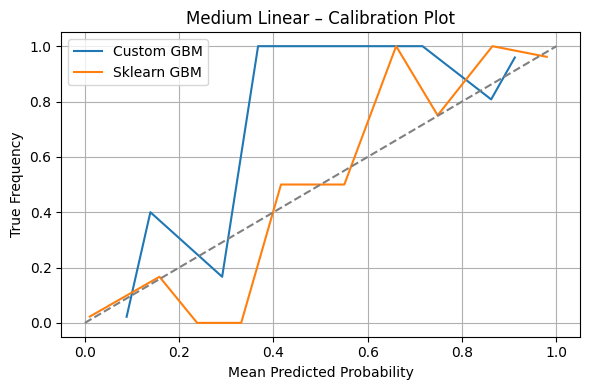

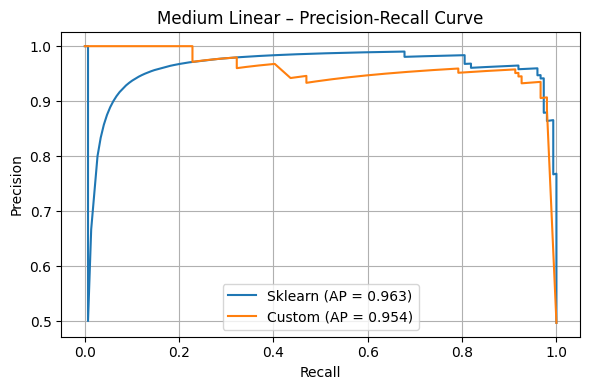

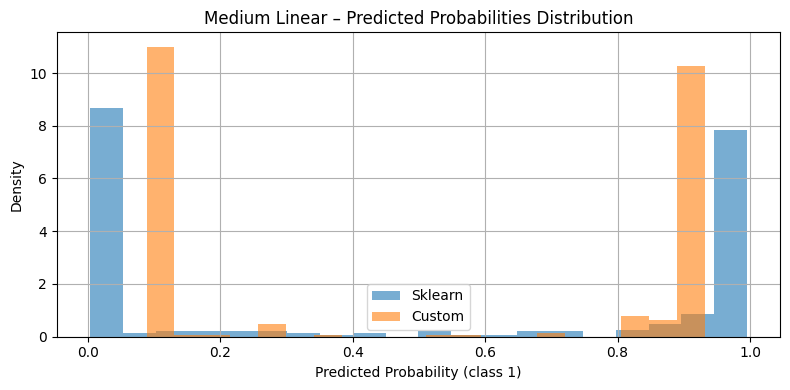

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay,
    precision_recall_curve, average_precision_score, log_loss
)
from sklearn.calibration import calibration_curve



# Helper to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Define datasets
datasets = {
    "Moons": make_moons(n_samples=500, noise=0.3, random_state=42),
    "Circles": make_circles(n_samples=500, factor=0.5, noise=0.3, random_state=42),
    "Linear": make_classification(n_samples=500, n_features=2, n_informative=2, 
                                   n_redundant=0, n_clusters_per_class=1, random_state=42),
    "Medium Linear": make_classification(n_samples=1000, n_features=5, n_informative=3, 
                                         n_redundant=2, random_state=42)
}

# Loop and evaluate
for name, (X, y) in datasets.items():
    print(f"\n📊 Dataset: {name}")
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Sklearn model
    sk_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    sk_model.fit(X_train, y_train)
    y_pred_sk = sk_model.predict(X_test)
    proba_sk = sk_model.predict_proba(X_test)[:, 1]

    # Custom model
    my_model = BoostingTreesClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=3,
        early_stopping_rounds=10, validation_fraction=0.1, n_jobs=4
    )
    my_model.fit(X_train, y_train)
    y_pred_my = my_model.predict(X_test)
    proba_my = my_model.predict_proba(X_test)[:, 1]

    # --- Metrics ---
    acc_sk = accuracy_score(y_test, y_pred_sk)
    acc_my = accuracy_score(y_test, y_pred_my)
    f1_sk = f1_score(y_test, y_pred_sk)
    f1_my = f1_score(y_test, y_pred_my)
    logloss_sk = log_loss(y_test, proba_sk)
    logloss_my = log_loss(y_test, proba_my)

    print(f"✅ Sklearn Accuracy: {acc_sk:.4f}, F1: {f1_sk:.4f}, LogLoss: {logloss_sk:.4f}")
    print(f"✅ Custom  Accuracy: {acc_my:.4f}, F1: {f1_my:.4f}, LogLoss: {logloss_my:.4f}")

    # --- Confusion Matrices ---
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_my, ax=ax[0], colorbar=False)
    ax[0].set_title("Custom GBM Confusion")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sk, ax=ax[1], colorbar=False)
    ax[1].set_title("Sklearn GBM Confusion")
    plt.suptitle(f"{name} – Confusion Matrices")
    plt.tight_layout()
    plt.show()

    # --- ROC Curve ---
    fpr_sk, tpr_sk, _ = roc_curve(y_test, proba_sk)
    fpr_my, tpr_my, _ = roc_curve(y_test, proba_my)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr_sk, tpr_sk, label=f'Sklearn (AUC = {auc(fpr_sk, tpr_sk):.3f})')
    plt.plot(fpr_my, tpr_my, label=f'Custom (AUC = {auc(fpr_my, tpr_my):.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} – ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Calibration Plot ---
    true_sk, pred_sk = calibration_curve(y_test, proba_sk, n_bins=10)
    true_my, pred_my = calibration_curve(y_test, proba_my, n_bins=10)

    plt.figure(figsize=(6, 4))
    plt.plot(pred_my, true_my, label="Custom GBM")
    plt.plot(pred_sk, true_sk, label="Sklearn GBM")
    plt.plot([0, 1], [0, 1], "--", color='gray')
    plt.title(f"{name} – Calibration Plot")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("True Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Precision-Recall Curve ---
    precision_sk, recall_sk, _ = precision_recall_curve(y_test, proba_sk)
    precision_my, recall_my, _ = precision_recall_curve(y_test, proba_my)

    plt.figure(figsize=(6, 4))
    plt.plot(recall_sk, precision_sk, label=f"Sklearn (AP = {average_precision_score(y_test, proba_sk):.3f})")
    plt.plot(recall_my, precision_my, label=f"Custom (AP = {average_precision_score(y_test, proba_my):.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{name} – Precision-Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Histogram of Probabilities ---
    plt.figure(figsize=(8, 4))
    plt.hist(proba_sk, bins=20, alpha=0.6, label="Sklearn", density=True)
    plt.hist(proba_my, bins=20, alpha=0.6, label="Custom", density=True)
    plt.title(f"{name} – Predicted Probabilities Distribution")
    plt.xlabel("Predicted Probability (class 1)")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Decision Boundaries (only for 2D features) ---
    if X.shape[1] == 2:
        plot_decision_boundary(sk_model, X_test, y_test, f"{name} – Sklearn Decision Boundary")
        plot_decision_boundary(my_model, X_test, y_test, f"{name} – Custom Decision Boundary")
